In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
J = 1
kb = 1
N = 8
T = 2
B = 1
def R(T,B):
    return np.array([[np.e**((J+B)/(kb*T)),np.e**(-J/(kb*T))],
                     [np.e**(-J/(kb*T)),np.e**((J-B)/(kb*T))]])
print (R(T,B))

[[2.71828183 0.60653066]
 [0.60653066 1.        ]]


In [3]:
N = 8
T = 20
B = 3
def solution(T,B):
    return np.linalg.eigvalsh(R(T,B))
def exact_solution(T,B):
    return np.array([np.e**(J/(kb*T))*(np.cosh(B/(kb*T))-(((np.sinh(B/(kb*T)))**2+np.e**(-4*J/(kb*T))))**0.5),
                     np.e**(J/(kb*T))*(np.cosh(B/(kb*T))+(((np.sinh(B/(kb*T)))**2+np.e**(-4*J/(kb*T))))**0.5)])
print("solution = ",solution(20,3))
print("exact_solution = ",exact_solution(20,3))

solution =  [0.09881162 2.02742856]
exact_solution =  [0.09881162 2.02742856]


In [4]:
N = 8
T = 20
B = 5
def Z(N,T,B):
    for i in range(N):
        if i == 0:
            z = R(T,B)
        else:
            z = np.dot(z,R(T,B))
    return z
def exact_Z(N,T,B):
    return exact_solution(T,B)[0]**N+exact_solution(T,B)[1]**N
print("exact_solution = ",exact_Z(N,T,B))
print("solution = ",np.trace(Z(N,T,B)))

exact_solution =  339.5848340756952
solution =  339.5848340756945


For N =  50  T =  1  B =  0



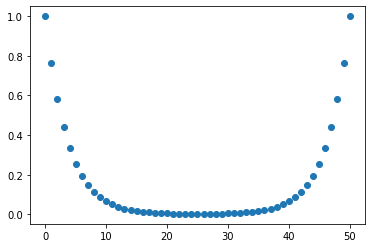

In [5]:
N = 50
T = 1
B = 0
impurity = np.array([[1,0],[0,-1]])
def S(j):
    s = np.eye(2)
    for x in range(N):
        if x == 0:
            s = np.dot(s,impurity)
        if x == j:
            s = np.dot(s,impurity)
        s = np.dot(s,R(T,B))
    return np.trace(s)/np.trace(Z(N,T,B))
print ("For N = ",N," T = ",T," B = ",B)
#for i in range(N):
#    print ("For j = ",i," S(0,j) = ",S(i))
v = np.zeros(N+1)
for i in range (N):
    v[i] = S(i)
v[N]=S(0)
plt.plot(v,'o')
print()

For N =  50  T =  1  B =  0



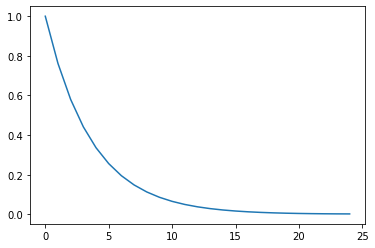

In [6]:
v = np.zeros(int(N/2))
for i in range (int(N/2)):
    v[i] = S(i)
plt.plot(v)
print ("For N = ",N," T = ",T," B = ",B)
print()

According to the figures, we find that T can not less than 0.12 in the case N = 50,  B = 0.1


TypeError: not enough arguments for format string

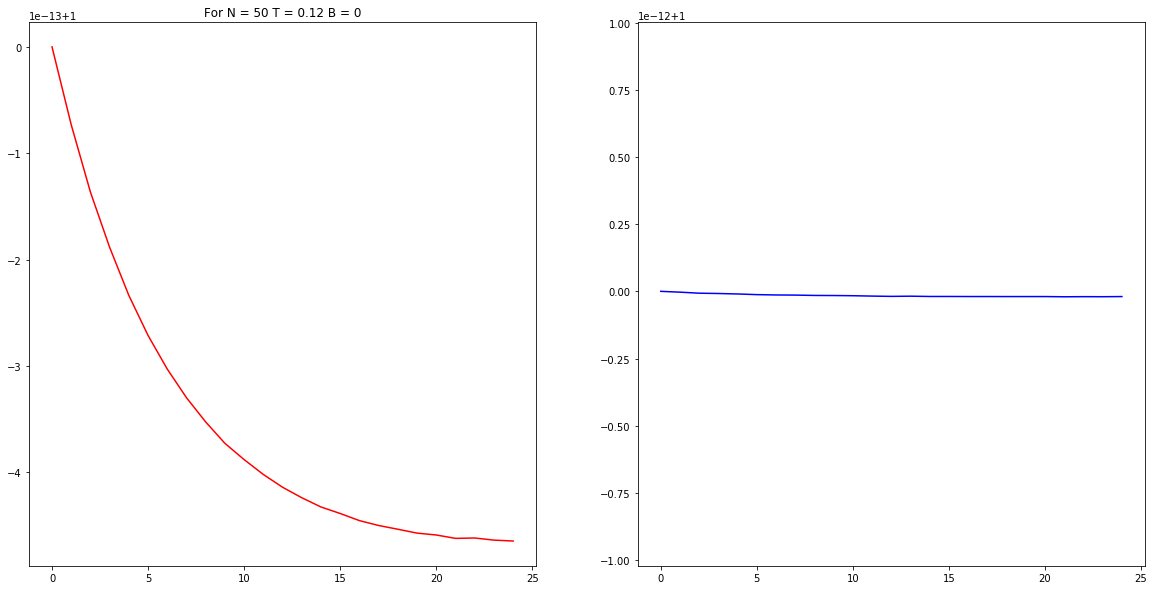

In [7]:
N = 50
T = 0.12
B = 0.01
impurity = np.array([[1,0],[0,-1]])
def S(j):
    s = np.eye(2)
    for x in range(N):
        if x == 0:
            s = np.dot(s,impurity)
        if x == j:
            s = np.dot(s,impurity)
        s = np.dot(s,R(T,B))
    return np.trace(s)/np.trace(Z(N,T,B))
v = np.zeros(int(N/2))
for i in range (int(N/2)):
    v[i] = S(i)
N1 = 50
T1 = 0.11
B1 = 0.01
impurity = np.array([[1,0],[0,-1]])
def S(j):
    s = np.eye(2)
    for x in range(N1):
        if x == 0:
            s = np.dot(s,impurity)
        if x == j:
            s = np.dot(s,impurity)
        s = np.dot(s,R(T1,B1))
    return np.trace(s)/np.trace(Z(N1,T1,B1))
w = np.zeros(int(N1/2))
for i in range (int(N1/2)):
    w[i] = S(i)
print("According to the figures, we find that T can not less than 0.12 in the case N = 50,  B = 0.1")
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(v,'r')
plt.title("For N = %i T = %.2f B = %i" %(N,T,B))
plt.subplot(1,2,2)
plt.plot(w,'b')
plt.title("For N = %i T = %.2f T1 B = %i" %(N1,B))
plt.show()

D:\Application\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


According to the figures, we find that N can not more than 84 in the case T = 0.12,  B = 0.1


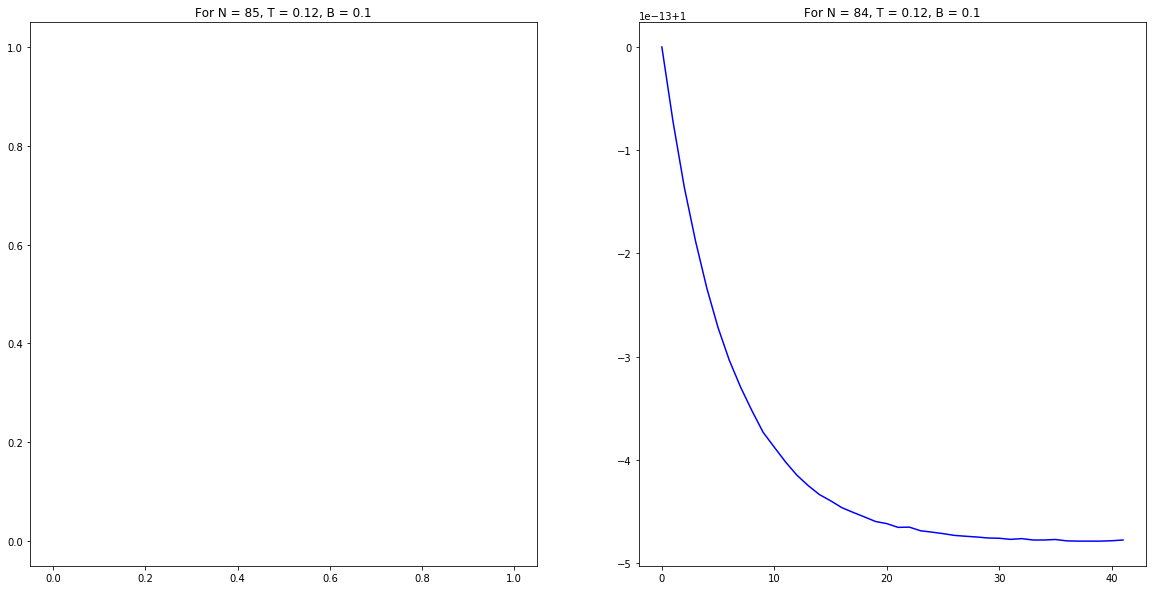

In [8]:
N = 85
T = 0.12
B = 0.01
impurity = np.array([[1,0],[0,-1]])
def S(j):
    s = np.eye(2)
    for x in range(N):
        if x == 0:
            s = np.dot(s,impurity)
        if x == j:
            s = np.dot(s,impurity)
        s = np.dot(s,R(T,B))
    return np.trace(s)/np.trace(Z(N,T,B))
v = np.zeros(int(N/2))
for i in range (int(N/2)):
    v[i] = S(i)
N = 84
T = 0.12
B = 0.01
impurity = np.array([[1,0],[0,-1]])
def S(j):
    s = np.eye(2)
    for x in range(N):
        if x == 0:
            s = np.dot(s,impurity)
        if x == j:
            s = np.dot(s,impurity)
        s = np.dot(s,R(T,B))
    return np.trace(s)/np.trace(Z(N,T,B))
w = np.zeros(int(N/2))
for i in range (int(N/2)):
    w[i] = S(i)
print("According to the figures, we find that N can not more than 84 in the case T = 0.12,  B = 0.1")
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(v,'r')
plt.title("For N = 85, T = 0.12, B = 0.1")
plt.subplot(1,2,2)
plt.plot(w,'b')
plt.title("For N = 84, T = 0.12, B = 0.1")
plt.show()